# INTRODUCTION
This notebook contains sales forecasting model proof of concept and experiments for Briton and kay supermarket Oleh Branch
...

# LIBRARY IMPORTATION

In [1]:
#import data manipulation libraries
import os

import pandas as pd
import numpy as np
import pdfplumber
import pymupdf
from pdfquery import PDFQuery

import re

# import data visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt 


from pathlib import Path

# EXPLORATORY DATA ANALYSIS

### Importation of raw data

In [277]:
#raw data path
raw_data_path = Path.joinpath(Path.cwd().parent,"data/raw/details.pdf")

#create an empty list of dataframes
data_frames = []

try: 
    with pymupdf.open(raw_data_path) as pdf:
            sales_group = []
            for page_index, page in enumerate(pdf):
                rows=[]
                lines = page.get_text('blocks')
                date_pattern = r'\d{2}/\d{2}/\d{4}'
                for line in lines:
                    if line[0] == -0.2411675900220871:
                        split_lines = line[4].splitlines()
                        date_indices = [index  for index, element in enumerate(split_lines) if re.search(date_pattern, element)]
                        for index_number, index in enumerate(date_indices):
                            if index_number < len(date_indices)-1:
                                sales_group = split_lines[index:date_indices[index_number + 1]]
                            else:
                                sales_group = split_lines[index:]
                            if re.match(r'\D', sales_group[3]):
                                break
                            else:
                                sales_group.insert(3,'')
                            main_row = sales_group[:10]
                            #Retrieve groups of 4 elements after the 9th element
                            for i in range(10, len(sales_group), 4):
                                sub_row = sales_group[i:i + 4]  # Get a group of 4 elements
                                if len(sub_row) < 4:
                                    page_element = [element for element in sub_row  if re.search('page', element, re.IGNORECASE)]
                                    if page_element:
                                        break
                                    else:
                                        sub_row += [''] * (4 - len(sub_row))  # Pad with empty strings if fewer than 4 elements
                                    
                                rows.append(main_row + sub_row)
                # if page_index == 2:
                #      print('maximum page reached')
                #      break
                print(f'\r processed page {page_index + 1}', end=" ")  
                page_df = pd.DataFrame(rows, columns=['Date','Receipt_no', 'Receipt_type','Customer', 'Total_qnty', 
                                                    'Total_amount', 'Payment_type', 'Time', 'Cashpoint_number', 'Cashier', 
                                                            'item_no', 'product_name', 'quantity','amount'])
                data_frames.append(page_df)
except FileNotFoundError:
    print('\n file path does not exist')
except Exception as e :
    print(f'\n something went wrong: \n {e}')


 processed page 10122 

In [278]:
main_df = pd.concat(data_frames, ignore_index= True)
main_df.head(30)

,Date,Receipt_no,Receipt_type,Customer,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount
0,12/01/2022,437170,Sales,,1,600.00,Cash,10:10:31 pm,14,DIRECTOR,8893,KOLAQ ALAGBO BITTERS 200M,1,600.00
1,12/01/2022,437169,Sales,,2,470.00,Cash,10:10:08 pm,14,DIRECTOR,1405,COCA COLA PET 60CL,1,170.00
2,12/01/2022,437169,Sales,,2,470.00,Cash,10:10:08 pm,14,DIRECTOR,90,MCVITE'S DIGESTIVE 104G,1,300.00
3,12/01/2022,437168,Sales,,1,100.00,Cash,10:09:10 pm,14,DIRECTOR,7347,ROENEX SMALLEST PEANUTS,1,100.00
4,12/01/2022,437173,Sales,,2,"2,100.00",Debit Card,10:14:36 pm,14,DIRECTOR,2855,EASY ON SPRAY STARCH NEW,1,"1,500.00"
5,12/01/2022,437173,Sales,,2,"2,100.00",Debit Card,10:14:36 pm,14,DIRECTOR,4403,COLGATE NIG MAXI CAVITY P,1,600.00
6,12/01/2022,437172,Sales,,1,"1,500.00",Cash,10:11:50 pm,14,DIRECTOR,1686,RIGHT GUARD COOL SPRAY,1,"1,500.00"
7,12/01/2022,437171,Sales,,1,"1,840.00",Cash,10:11:05 pm,14,DIRECTOR,399,GOLDEN MORN 1kg,1,"1,840.00"
8,12/01/2022,437167,Sales,,1,600.00,Cash,10:08:52 pm,14,DIRECTOR,3743,VITAMILK DOUBLE CHOCO DR,1,600.00
9,12/01/2022,437163,Sales,,1,"2,300.00",Debit Card,10:06:41 pm,14,DIRECTOR,1721,BODY FANTASIES RASPBERRY,1,"2,300.00"


In [279]:
main_df.shape

(337483, 14)

In [280]:
#save impported dataframe to CSV
file_save_path = "data/processed/imported_oleh_sales_pymudf.csv"

imported_data_path = Path.joinpath(Path.cwd().parent,file_save_path)
main_df.to_csv(imported_data_path)

### Structural and Quality investigation

In [113]:
#import the save CSV
file_save_path = "data/processed/imported_oleh_sales_pymudf.csv"

imported_data_path = Path.joinpath(Path.cwd().parent,file_save_path)
import_df = pd.read_csv(imported_data_path, index_col=0, low_memory = False)

Overall structure of the imported dataframe 

In [4]:
import_df.head()

,Date,Receipt_no,Receipt_type,Customer,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount
0,12/01/2022,437170,Sales,NaN,1,600.00,Cash,10:10:31 pm,14,DIRECTOR,8893,KOLAQ ALAGBO BITTERS 200M,1,600.00
1,12/01/2022,437169,Sales,NaN,2,470.00,Cash,10:10:08 pm,14,DIRECTOR,1405,COCA COLA PET 60CL,1,170.00
2,12/01/2022,437169,Sales,NaN,2,470.00,Cash,10:10:08 pm,14,DIRECTOR,90,MCVITE'S DIGESTIVE 104G,1,300.00
3,12/01/2022,437168,Sales,NaN,1,100.00,Cash,10:09:10 pm,14,DIRECTOR,7347,ROENEX SMALLEST PEANUTS,1,100.00
4,12/01/2022,437173,Sales,NaN,2,"2,100.00",Debit Card,10:14:36 pm,14,DIRECTOR,2855,EASY ON SPRAY STARCH NEW,1,"1,500.00"


In [283]:
import_df.shape

(337483, 14)

Basic information of the dataframe, in terms of object type, count and column names

In [284]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337483 entries, 0 to 337482
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              337483 non-null  object 
 1   Receipt_no        337483 non-null  int64  
 2   Receipt_type      337483 non-null  object 
 3   Customer          0 non-null       float64
 4   Total_qnty        337483 non-null  int64  
 5   Total_amount      337483 non-null  object 
 6   Payment_type      337179 non-null  object 
 7   Time              337483 non-null  object 
 8   Cashpoint_number  337483 non-null  int64  
 9   Cashier           337483 non-null  object 
 10  item_no           337483 non-null  int64  
 11  product_name      337483 non-null  object 
 12  quantity          337483 non-null  int64  
 13  amount            337483 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 38.6+ MB


Based on the information from the data, the data type of some of the columns will have to corrected to ensure proper investigation and analysis can be done

Check for missing values

In [285]:
import_df.isna().sum()

Date                     0
Receipt_no               0
Receipt_type             0
Customer            337483
Total_qnty               0
Total_amount             0
Payment_type           304
Time                     0
Cashpoint_number         0
Cashier                  0
item_no                  0
product_name             0
quantity                 0
amount                   0
dtype: int64

Since missing values occurs in just one feature and with very little percentage, a simple imputation using the mode of the feature. 

Checking for duplicated rows

In [286]:
print(import_df.duplicated().sum())

23974


In [287]:
duplicate_rows = import_df[import_df.duplicated()]
duplicate_rows.head(30)

,Date,Receipt_no,Receipt_type,Customer,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount
27,13/01/2022,437304,Sales,NaN,5,225.00,Cash,5:00:56 pm,14,DIRECTOR,1131,MENTOS FRUIT,1,45.00
28,13/01/2022,437304,Sales,NaN,5,225.00,Cash,5:00:56 pm,14,DIRECTOR,1131,MENTOS FRUIT,1,45.00
29,13/01/2022,437304,Sales,NaN,5,225.00,Cash,5:00:56 pm,14,DIRECTOR,1131,MENTOS FRUIT,1,45.00
30,13/01/2022,437304,Sales,NaN,5,225.00,Cash,5:00:56 pm,14,DIRECTOR,1131,MENTOS FRUIT,1,45.00
46,13/01/2022,437299,Sales,NaN,12,"4,104.00",Debit Card,4:31:30 pm,13,DIRECTOR,11743,DIDIAN SODA CRACKER 100G,1,450.00
47,13/01/2022,437299,Sales,NaN,12,"4,104.00",Debit Card,4:31:30 pm,13,DIRECTOR,2904,DRIVE SPRAY,1,"1,080.00"
57,13/01/2022,437315,Sales,NaN,3,"3,771.00",Cash,5:40:36 pm,13,DIRECTOR,8375,LASER CORNED BEEF 340G,1,"1,440.00"
61,13/01/2022,437314,Sales,NaN,5,"2,781.00",Debit Card,5:37:47 pm,13,DIRECTOR,627,PURE HEAVEN CAN 330ML,1,540.00
62,13/01/2022,437314,Sales,NaN,5,"2,781.00",Debit Card,5:37:47 pm,13,DIRECTOR,627,PURE HEAVEN CAN 330ML,1,540.00
72,13/01/2022,437308,Sales,NaN,3,"2,205.00",Cash,5:15:27 pm,14,DIRECTOR,45,DUDU OSUN BLACK SOAP,1,315.00


Duplicate Values are from items that were scanned multiple times

##### Convert Data to desirable types


Join Date, Time and time of day to get a datetime column and convert to pandas datetime for accurate analysis

In [114]:

# Ensure Date and Time columns are strings
import_df[['Date', 'Time']] = import_df[['Date', 'Time']].astype('str')

# Add 12 hours to the Time column where Time_of_day is "pm"
def convert_to_24hr(row):
    time_pattern = r'\d{1}:\d{2}:\d{2} | ^\d{2}:\d{2}:\d{2}'
    if re.search(time_pattern, row['Time']):
        time_parts = row['Time'].split(' ')
        time = time_parts[0]
        time_of_day = time_parts[1]
        time = time.split(':')
        # print(time[0])
        hour = int(time[0])
        if time_of_day.lower() == 'pm' and hour < 12:  # Add 12 hours for PM, except for 12 PM
            hour += 12
        elif time_of_day.lower().lower() == 'am' and hour == 12:  # Handle 12 AM as 00
            hour = 0
        time[0] = str(hour).zfill(2)  # Ensure hour is two digits
        return ':'.join(time)
    else: 
        return None

import_df['Time_24'] = import_df.apply(convert_to_24hr, axis=1)

# Combine Date and Time into a single datetime column
import_df['Datetime'] = pd.to_datetime(import_df['Date'] + ' ' + import_df['Time_24'], format = 'mixed', dayfirst=True)

# Drop the original Date and Time columns if no longer needed
# import_df = import_df.drop(columns=['Date', 'Time'])

# Display the updated DataFrame
import_df.head()

,Date,Receipt_no,Receipt_type,Customer,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime
0,12/01/2022,437170,Sales,NaN,1,600.00,Cash,10:10:31 pm,14,DIRECTOR,8893,KOLAQ ALAGBO BITTERS 200M,1,600.00,22:10:31,2022-01-12 22:10:31
1,12/01/2022,437169,Sales,NaN,2,470.00,Cash,10:10:08 pm,14,DIRECTOR,1405,COCA COLA PET 60CL,1,170.00,22:10:08,2022-01-12 22:10:08
2,12/01/2022,437169,Sales,NaN,2,470.00,Cash,10:10:08 pm,14,DIRECTOR,90,MCVITE'S DIGESTIVE 104G,1,300.00,22:10:08,2022-01-12 22:10:08
3,12/01/2022,437168,Sales,NaN,1,100.00,Cash,10:09:10 pm,14,DIRECTOR,7347,ROENEX SMALLEST PEANUTS,1,100.00,22:09:10,2022-01-12 22:09:10
4,12/01/2022,437173,Sales,NaN,2,"2,100.00",Debit Card,10:14:36 pm,14,DIRECTOR,2855,EASY ON SPRAY STARCH NEW,1,"1,500.00",22:14:36,2022-01-12 22:14:36


In [115]:
#List of Numeric columns and categorical columns
integer_columns = ['Receipt_no', 'Total_qnty', 'item_no', 'quantity']
float_columns = ['Total_amount','amount']
categorical_columns = ['Payment_type', 'Cashier', 'Cashpoint_number']

for column in float_columns + integer_columns:
    import_df[column] = import_df[column].astype('str').str.replace(',','')

import_df[integer_columns] = import_df[integer_columns].astype('int32') #convert to integer
import_df[float_columns] = import_df[float_columns].astype('float32') #convert to float 
import_df[categorical_columns] = import_df[categorical_columns].astype('category') # convert categorical columns 
import_df['product_name'] = import_df['product_name'].astype('string') #convert to string column
import_df['Customer'] = import_df['Customer'].astype('string') #convert to string column

import_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337483 entries, 0 to 337482
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              337483 non-null  object        
 1   Receipt_no        337483 non-null  int32         
 2   Receipt_type      337483 non-null  object        
 3   Customer          0 non-null       string        
 4   Total_qnty        337483 non-null  int32         
 5   Total_amount      337483 non-null  float32       
 6   Payment_type      337179 non-null  category      
 7   Time              337483 non-null  object        
 8   Cashpoint_number  337483 non-null  category      
 9   Cashier           337483 non-null  category      
 10  item_no           337483 non-null  int32         
 11  product_name      337483 non-null  string        
 12  quantity          337483 non-null  int32         
 13  amount            337483 non-null  float32       
 14  Time_24  

#### Handle Missing Values

- Drop the customer column because there are not enough values
- Use the mode for the payment type as imputation

In [137]:
#Drop Customer field 
import_df = import_df.drop(columns = ['Customer'])

#use mode for the imputation of Payment Type
import_df['Payment_type'] = import_df['Payment_type'].fillna(import_df['Payment_type'].mode()[0])

#check missing values again 
import_df.isna().sum()

Date                0
Receipt_no          0
Receipt_type        0
Total_qnty          0
Total_amount        0
Payment_type        0
Time                0
Cashpoint_number    0
Cashier             0
item_no             0
product_name        0
quantity            0
amount              0
Time_24             0
Datetime            0
hour                0
day                 0
month               0
year                0
dtype: int64

Split Datetime into parts of day, week, months, and year for further analysis.

In [138]:
#create the hour, day, month and year fields.
import_df['hour'] = import_df['Datetime'].dt.hour
import_df['day'] = import_df['Datetime'].dt.day_name()
import_df['month'] = import_df['Datetime'].dt.month_name()
import_df['year'] = import_df['Datetime'].dt.year
import_df.head()

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
0,12/01/2022,437170,Sales,1,600.0,Cash,10:10:31 pm,14,DIRECTOR,8893,KOLAQ ALAGBO BITTERS 200M,1,600.0,22:10:31,2022-01-12 22:10:31,22,Wednesday,January,2022
1,12/01/2022,437169,Sales,2,470.0,Cash,10:10:08 pm,14,DIRECTOR,1405,COCA COLA PET 60CL,1,170.0,22:10:08,2022-01-12 22:10:08,22,Wednesday,January,2022
2,12/01/2022,437169,Sales,2,470.0,Cash,10:10:08 pm,14,DIRECTOR,90,MCVITE'S DIGESTIVE 104G,1,300.0,22:10:08,2022-01-12 22:10:08,22,Wednesday,January,2022
3,12/01/2022,437168,Sales,1,100.0,Cash,10:09:10 pm,14,DIRECTOR,7347,ROENEX SMALLEST PEANUTS,1,100.0,22:09:10,2022-01-12 22:09:10,22,Wednesday,January,2022
4,12/01/2022,437173,Sales,2,2100.0,Debit Card,10:14:36 pm,14,DIRECTOR,2855,EASY ON SPRAY STARCH NEW,1,1500.0,22:14:36,2022-01-12 22:14:36,22,Wednesday,January,2022


##### Statistical summary of numeric columns

In [79]:
import_df[float_columns + integer_columns].describe()

,Total_amount,amount,Receipt_no,Total_qnty,item_no,quantity
count,3.374830e+05,337483.000000,337483.000000,337483.000000,337483.000000,337483.000000
mean,1.233963e+04,1326.317505,509427.105051,12.138253,6389.577905,1.681110
std,2.564205e+04,2238.525879,43251.336188,23.595985,5182.467477,4.332728
min,-1.246000e+04,0.000000,437161.000000,0.000000,2.000000,-36.000000
25%,1.550000e+03,300.000000,472478.500000,2.000000,1107.000000,1.000000
50%,4.680000e+03,680.000000,509908.000000,5.000000,5705.000000,1.000000
75%,1.300500e+04,1650.000000,545715.000000,12.000000,12084.000000,1.000000
max,1.273450e+06,120000.000000,588398.000000,904.000000,15350.000000,600.000000


Negative values corresponding to Total amount and quantity are due to the wrongful entry  of data. 

#### Handle Inconsistent Data

In [89]:
import_df.sort_values(by='Total_amount', ascending = True)

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
125640,14/07/2023,488547,Sales,4,-12460.0,Cash,5:27:11 pm,17,DIRECTOR,1437,FLIRT VODKA CHOC FLAVOUR,1,6250.0,17:27:11,2023-07-14 17:27:11,17,Friday,July,2023
125641,14/07/2023,488547,Sales,4,-12460.0,Cash,5:27:11 pm,17,DIRECTOR,4335,WHITE & BLUE WHISKY,1,3400.0,17:27:11,2023-07-14 17:27:11,17,Friday,July,2023
125642,14/07/2023,488547,Sales,4,-12460.0,Cash,5:27:11 pm,17,DIRECTOR,3594,CAPRI-SUN ORANGE,3,130.0,17:27:11,2023-07-14 17:27:11,17,Friday,July,2023
125639,14/07/2023,488547,Sales,4,-12460.0,Cash,5:27:11 pm,17,DIRECTOR,12826,OLMECA TEQUILA BLANCO W,-1,22500.0,17:27:11,2023-07-14 17:27:11,17,Friday,July,2023
116992,18/06/2023,485152,Sales,4,-4980.0,Cash,7:37:13 pm,17,FEGO,13406,REFRESH VANILLA 500ML YOG,2,1250.0,19:37:13,2023-06-18 19:37:13,19,Sunday,June,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264665,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,12085,MILO REFILL 800G,18,5390.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024
264663,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,14430,BNC 400ML MOSQUITO SPRAY,8,1630.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024
264657,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,379,THREE CROWN EVAPORATED,72,610.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024
264664,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,348,PEAK 400G REFILL FULL CRE,36,3800.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024


In [90]:
import_df.sort_values(by='Total_qnty', ascending = True)

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
199004,15/02/2024,522801,Sales,0,60.0,Cash,8:53:38 pm,17,WILSON,266,SNICKERS BAR (SMALL),-1,1000.0,20:53:38,2024-02-15 20:53:38,20,Thursday,February,2024
213066,16/03/2024,528619,Sales,0,-70.0,Cash,5:18:30 pm,19,GLORY,12712,SOFTCARE SANITARY ZIP,1,1950.0,17:18:30,2024-03-16 17:18:30,17,Saturday,March,2024
30122,21/07/2022,449066,Sales,0,-50.0,Cash,7:07:56 pm,14,FEGO,5845,COLAGATE TOTAL12 ADVANC,-1,1250.0,19:07:56,2022-07-21 19:07:56,19,Thursday,July,2022
30121,21/07/2022,449066,Sales,0,-50.0,Cash,7:07:56 pm,14,FEGO,5854,COLAGATE TOTAL12 ORIGINA,1,1200.0,19:07:56,2022-07-21 19:07:56,19,Thursday,July,2022
285784,27/09/2024,559677,Sales,0,0.0,Debit Card,7:12:56 pm,19,GLORY,630,HOLLANDIA YOGHURT PLAIN,-1,1800.0,19:12:56,2024-09-27 19:12:56,19,Friday,September,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264677,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,13848,GOOD MAMA 1.7KG DETERGE,4,2880.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024
264676,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,399,GOLDEN MORN 900G,18,3200.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024
264675,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,3352,SWISS SPRAY A/F TANGERINE,12,1050.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024
264660,26/07/2024,550518,Sales,904,1273450.0,Debit Card,10:32:03 am,17,FEGO,3804,TOPRANK INSECTICIDE 600ML,12,3050.0,10:32:03,2024-07-26 10:32:03,10,Friday,July,2024


In [91]:
import_df.sort_values(by='quantity', ascending = True )

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
280177,08/09/2024,557098,Sales,0,-1320.0,Cash,6:52:44 pm,17,FEGO,2878,AQUAFINA WATER,-36,220.000000,18:52:44,2024-09-08 18:52:44,18,Sunday,September,2024
287340,02/10/2024,560275,Sales,0,0.0,Debit Card,2:51:27 pm,17,FEGO,6242,MOYATOS SOYA M/S PROTEIN,-13,560.000000,14:51:27,2024-10-02 14:51:27,14,Wednesday,October,2024
35823,15/08/2022,450938,Sales,0,0.0,Debit Card,5:10:33 pm,14,DIRECTOR,8319,COCA-COLA CAN 33CL,-13,200.000000,17:10:33,2022-08-15 17:10:33,17,Monday,August,2022
287145,02/10/2024,560358,Sales,0,0.0,Debit Card,8:23:47 pm,17,FEGO,14864,OATHLAND VANILLA YOGHUR,-13,2070.000000,20:23:47,2024-10-02 20:23:47,20,Wednesday,October,2024
94734,16/04/2023,476381,Sales,0,640.0,Debit Card,5:19:45 pm,17,GLORY,620,EVA BOTTLED WATER 75cl,-12,120.830002,17:19:45,2023-04-16 17:19:45,17,Sunday,April,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310863,06/01/2025,575539,Sales,349,93740.0,Cash,8:13:23 pm,17,FEGO,633,NESTLE PURE LIFE BOTTLED,340,187.000000,20:13:23,2025-01-06 20:13:23,20,Monday,January,2025
322441,06/02/2025,581167,Sales,360,67320.0,Debit Card,8:47:22 pm,19,WILSON,633,NESTLE PURE LIFE BOTTLED,360,187.000000,20:47:22,2025-02-06 20:47:22,20,Thursday,February,2025
265559,29/07/2024,551010,Sales,655,148910.0,Cash,7:04:30 pm,17,GLORY,2878,AQUAFINA WATER,600,183.330002,19:04:30,2024-07-29 19:04:30,19,Monday,July,2024
107652,19/05/2023,481233,Sales,600,60000.0,Debit Card,1:56:11 pm,17,WILSON,2878,AQUAFINA WATER,600,100.000000,13:56:11,2023-05-19 13:56:11,13,Friday,May,2023


In [92]:
import_df.sort_values(by='amount', ascending = True )

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
146863,13/09/2023,496832,Sales,122,48750.0,Debit Card,8:20:00 pm,13,DEBORAH,13610,ENCHANTEUR CHARMING,1,0.0,20:20:00,2023-09-13 20:20:00,20,Wednesday,September,2023
154161,05/10/2023,499615,Sales,5,9950.0,Debit Card,5:07:08 pm,13,DEBORAH,13712,DULCET STRAWBERRY BREAD,1,0.0,17:07:08,2023-10-05 17:07:08,17,Thursday,October,2023
844,15/01/2022,437463,Sales,9,81.0,Cash,1:30:38 pm,13,KOME,10967,CADBURY COFFEE CANDY,3,9.0,13:30:38,2022-01-15 13:30:38,13,Saturday,January,2022
610,14/01/2022,437431,Sales,5,45.0,Cash,7:13:59 pm,14,DIRECTOR,3291,BUTTER MINT SINGLE,1,9.0,19:13:59,2022-01-14 19:13:59,19,Friday,January,2022
441,13/01/2022,437188,Sales,4,36.0,Cash,11:23:20 am,14,DIRECTOR,12287,MENTOS FRESH ACTION CAND,4,9.0,11:23:20,2022-01-13 11:23:20,11,Thursday,January,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307196,29/12/2024,573733,Sales,116,150690.0,Debit Card,11:05:58 am,19,JULIET,8055,GLENFIDDICH 18 YEARS SCO,1,107900.0,11:05:58,2024-12-29 11:05:58,11,Sunday,December,2024
308104,31/12/2024,574103,Sales,10,207080.0,Debit Card,9:57:09 am,17,FEGO,14906,100SHOTS THUNDER RAIN,1,110000.0,09:57:09,2024-12-31 09:57:09,9,Tuesday,December,2024
300335,13/12/2024,570989,Sales,39,133400.0,Debit Card,7:28:49 pm,19,VICTORIA,15,HENNESSEY VSOP,1,112500.0,19:28:49,2024-12-13 19:28:49,19,Friday,December,2024
305534,25/12/2024,573174,Sales,12,152150.0,Debit Card,8:44:20 pm,19,VICTORIA,14906,100SHOTS THUNDER RAIN,1,120000.0,20:44:20,2024-12-25 20:44:20,20,Wednesday,December,2024


In [139]:
import_df.sort_values(by='hour', ascending=True)

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
159776,22/10/2023,501604,Sales,14,12380.0,Debit Card,12:59:35 am,13,WILSON,1460,SMIRNOFF WITH GUARANA,1,650.0,00:59:35,2023-10-22 00:59:35,0,Sunday,October,2023
160873,25/10/2023,501923,Sales,13,13510.0,Debit Card,12:20:43 am,13,DEBORAH,12296,DIPLOMAT SELECT TOOTHBRU,1,380.0,00:20:43,2023-10-25 00:20:43,0,Wednesday,October,2023
160872,25/10/2023,501923,Sales,13,13510.0,Debit Card,12:20:43 am,13,DEBORAH,13751,TASTE IT STRAWBERRY BISUI,1,870.0,00:20:43,2023-10-25 00:20:43,0,Wednesday,October,2023
156793,13/10/2023,500532,Sales,5,5040.0,Debit Card,12:10:44 am,13,DEBORAH,12637,TETMOSOL MEDICATED CREA,1,720.0,00:10:44,2023-10-13 00:10:44,0,Friday,October,2023
160871,25/10/2023,501923,Sales,13,13510.0,Debit Card,12:20:43 am,13,DEBORAH,13753,MILK BREAKFAST BISCUITS,1,950.0,00:20:43,2023-10-25 00:20:43,0,Wednesday,October,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215241,20/03/2024,529508,Sales,1,300.0,Cash,11:05:27 pm,19,VICTORIA,621,EVA BOTTLED WATER 1.5L,1,300.0,23:05:27,2024-03-20 23:05:27,23,Wednesday,March,2024
187627,21/01/2024,517751,Sales,5,2340.0,Debit Card,11:43:40 pm,19,WILSON,13805,KISS SACHET LUBE GEL 5ML,3,200.0,23:43:40,2024-01-21 23:43:40,23,Sunday,January,2024
187626,21/01/2024,517751,Sales,5,2340.0,Debit Card,11:43:40 pm,19,WILSON,1046,MENTOS CHEWING GUM PEPP,1,220.0,23:43:40,2024-01-21 23:43:40,23,Sunday,January,2024
190710,28/01/2024,519021,Sales,13,9810.0,Debit Card,11:17:46 pm,19,WILSON,7402,SCHWEPPES CHAPMAN CAN,1,330.0,23:17:46,2024-01-28 23:17:46,23,Sunday,January,2024


Drop inconsistent data

In [187]:
#Clip data by time of day between 7 and 22:30
out_of_time_indices = np.where(import_df['hour'].astype('int32').apply(lambda x: x >22 or x <7 ))
quantity_indices = np.where(import_df['quantity'].apply(lambda x: x < 1 ))
Total_amount_indices = np.where(import_df['amount'].apply(lambda x: x < 1))

inconsitent_values = set(np.concatenate([out_of_time_indices[0], quantity_indices[0], Total_amount_indices[0]]))

import_df_clean = import_df.drop(index = inconsitent_values, errors = 'ignore')

import_df_clean.shape

(336235, 19)

In [188]:
import_df_clean.sort_values(by='amount', ascending = True)

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
813,15/01/2022,437513,Sales,2,252.0,Cash,7:14:33 pm,14,HALL-BLESSI,875,TOM TOM,1,9.0,19:14:33,2022-01-15 19:14:33,19,Saturday,January,2022
835,15/01/2022,437488,Sales,3,972.0,Cash,4:43:04 pm,13,KOME,12287,MENTOS FRESH ACTION CAND,1,9.0,16:43:04,2022-01-15 16:43:04,16,Saturday,January,2022
871,15/01/2022,437446,Sales,2,252.0,Cash,9:28:28 am,13,KOME,12287,MENTOS FRESH ACTION CAND,1,9.0,09:28:28,2022-01-15 09:28:28,9,Saturday,January,2022
447,13/01/2022,437252,Sales,1,9.0,Cash,2:43:47 pm,14,DIRECTOR,12287,MENTOS FRESH ACTION CAND,1,9.0,14:43:47,2022-01-13 14:43:47,14,Thursday,January,2022
177,13/01/2022,437348,Sales,15,2583.0,Cash,7:27:41 pm,13,DIRECTOR,4119,MILO CUBE,11,9.0,19:27:41,2022-01-13 19:27:41,19,Thursday,January,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307196,29/12/2024,573733,Sales,116,150690.0,Debit Card,11:05:58 am,19,JULIET,8055,GLENFIDDICH 18 YEARS SCO,1,107900.0,11:05:58,2024-12-29 11:05:58,11,Sunday,December,2024
308104,31/12/2024,574103,Sales,10,207080.0,Debit Card,9:57:09 am,17,FEGO,14906,100SHOTS THUNDER RAIN,1,110000.0,09:57:09,2024-12-31 09:57:09,9,Tuesday,December,2024
300335,13/12/2024,570989,Sales,39,133400.0,Debit Card,7:28:49 pm,19,VICTORIA,15,HENNESSEY VSOP,1,112500.0,19:28:49,2024-12-13 19:28:49,19,Friday,December,2024
306903,29/12/2024,573840,Sales,16,258210.0,Debit Card,6:32:19 pm,19,JULIET,14906,100SHOTS THUNDER RAIN,1,120000.0,18:32:19,2024-12-29 18:32:19,18,Sunday,December,2024


In [189]:
import_df_clean.sort_values(by='hour', ascending = True)

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
289927,10/10/2024,561284,Sales,2,770.0,Debit Card,7:56:57 am,19,JULIET,661,BABY CHERIE COTTON BUDS,1,350.0,07:56:57,2024-10-10 07:56:57,7,Thursday,October,2024
292738,21/10/2024,562503,Sales,2,6260.0,Debit Card,7:56:52 am,19,VICTORIA,13409,BRITONKAY BUTTER BREAD 1,1,2300.0,07:56:52,2024-10-21 07:56:52,7,Monday,October,2024
292739,21/10/2024,562503,Sales,2,6260.0,Debit Card,7:56:52 am,19,VICTORIA,13942,SOSOTAN MEDIUM PLANTAIN,1,3960.0,07:56:52,2024-10-21 07:56:52,7,Monday,October,2024
292740,21/10/2024,562502,Sales,2,950.0,Debit Card,7:52:57 am,19,VICTORIA,455,TURA SOAP,1,380.0,07:52:57,2024-10-21 07:52:57,7,Monday,October,2024
292741,21/10/2024,562502,Sales,2,950.0,Debit Card,7:52:57 am,19,VICTORIA,11441,CANOE EXTRA CARE ALL PUR,1,570.0,07:52:57,2024-10-21 07:52:57,7,Monday,October,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59957,31/12/2022,463122,Sales,2,490.0,Cash,10:10:18 pm,13,DEBORAH,629,MALTA GUINNESS CAN,1,240.0,22:10:18,2022-12-31 22:10:18,22,Saturday,December,2022
59955,31/12/2022,463120,Sales,1,900.0,Cash,10:01:16 pm,13,DEBORAH,1192,NIVEA DRY COMFORT ROLLON,1,900.0,22:01:16,2022-12-31 22:01:16,22,Saturday,December,2022
190678,28/01/2024,519016,Sales,16,5140.0,Debit Card,10:46:17 pm,19,WILSON,12890,MILO 3 IN 1 MILKY & CREAMY,10,150.0,22:46:17,2024-01-28 22:46:17,22,Sunday,January,2024
190680,28/01/2024,519016,Sales,16,5140.0,Debit Card,10:46:17 pm,19,WILSON,13409,BRITONKAY BUTTER BREAD 1,1,1680.0,22:46:17,2024-01-28 22:46:17,22,Sunday,January,2024


In [190]:
import_df_clean.sort_values(by='quantity', ascending = True)

,Date,Receipt_no,Receipt_type,Total_qnty,Total_amount,Payment_type,Time,Cashpoint_number,Cashier,item_no,product_name,quantity,amount,Time_24,Datetime,hour,day,month,year
0,12/01/2022,437170,Sales,1,600.0,Cash,10:10:31 pm,14,DIRECTOR,8893,KOLAQ ALAGBO BITTERS 200M,1,600.000000,22:10:31,2022-01-12 22:10:31,22,Wednesday,January,2022
213275,16/03/2024,528662,Sales,25,5140.0,Debit Card,7:40:37 pm,19,GLORY,13408,BRITONKAY BUTTER BREAD 9,1,1460.000000,19:40:37,2024-03-16 19:40:37,19,Saturday,March,2024
213272,16/03/2024,528644,Sales,1,2040.0,Cash,6:53:44 pm,19,GLORY,13409,BRITONKAY BUTTER BREAD 1,1,2040.000000,18:53:44,2024-03-16 18:53:44,18,Saturday,March,2024
213271,16/03/2024,528645,Sales,11,2710.0,Cash,6:58:05 pm,19,GLORY,1416,MONSTER ENERGY DRINK,1,900.000000,18:58:05,2024-03-16 18:58:05,18,Saturday,March,2024
213267,16/03/2024,528641,Sales,1,2040.0,Split,6:51:44 pm,19,GLORY,13409,BRITONKAY BUTTER BREAD 1,1,2040.000000,18:51:44,2024-03-16 18:51:44,18,Saturday,March,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310863,06/01/2025,575539,Sales,349,93740.0,Cash,8:13:23 pm,17,FEGO,633,NESTLE PURE LIFE BOTTLED,340,187.000000,20:13:23,2025-01-06 20:13:23,20,Monday,January,2025
322441,06/02/2025,581167,Sales,360,67320.0,Debit Card,8:47:22 pm,19,WILSON,633,NESTLE PURE LIFE BOTTLED,360,187.000000,20:47:22,2025-02-06 20:47:22,20,Thursday,February,2025
265559,29/07/2024,551010,Sales,655,148910.0,Cash,7:04:30 pm,17,GLORY,2878,AQUAFINA WATER,600,183.330002,19:04:30,2024-07-29 19:04:30,19,Monday,July,2024
128888,23/07/2023,489657,Sales,600,24000.0,Debit Card,10:58:12 am,17,WILSON,12141,NESCAFE CLASSIC 1.5G SACH,600,40.000000,10:58:12,2023-07-23 10:58:12,10,Sunday,July,2023


### Univariate Analysis of columns

Plot Distribution of all Numeric fields.

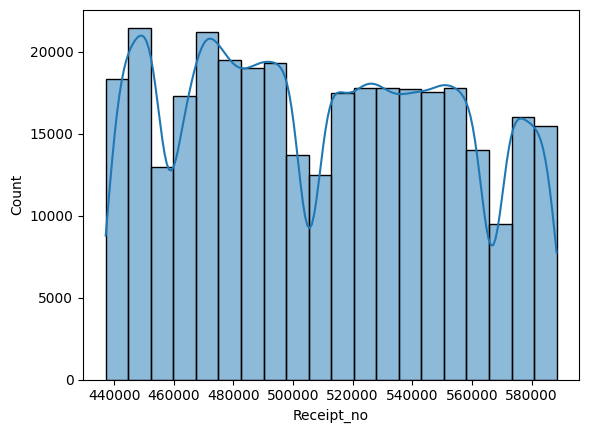

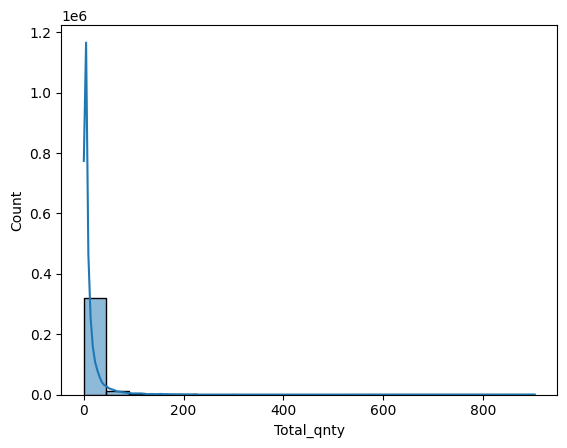

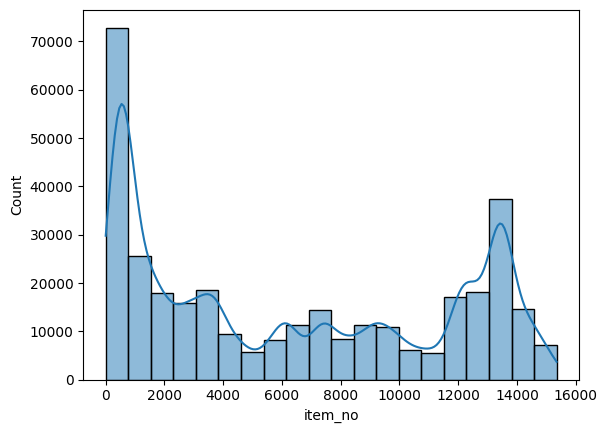

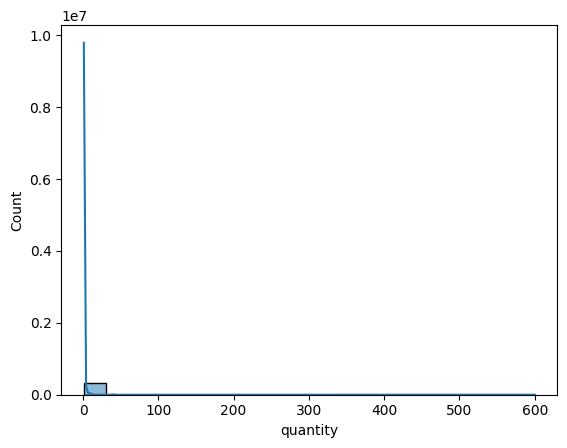

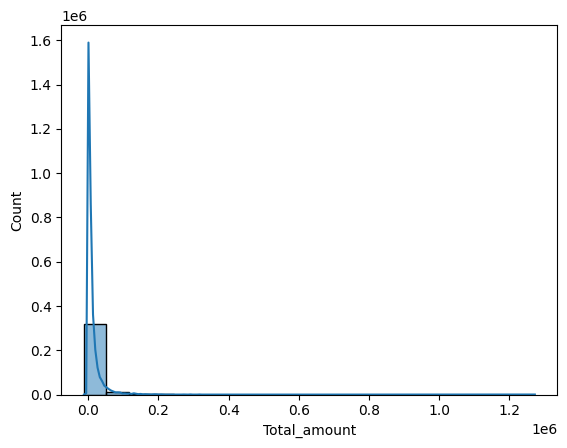

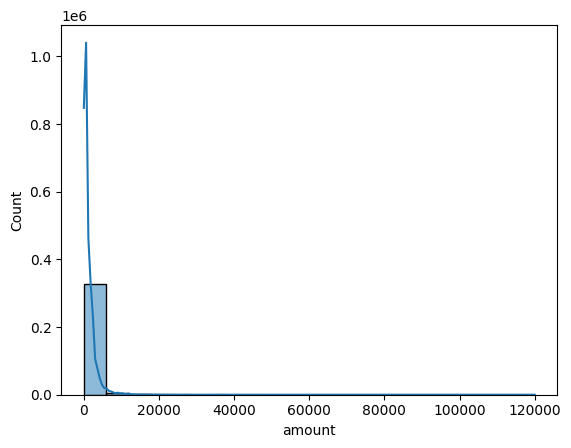

In [192]:
for field in integer_columns + float_columns:
    sns.histplot(import_df_clean[field], bins=20, kde=True)
    plt.show()
    

Distribution plot of categorical columns

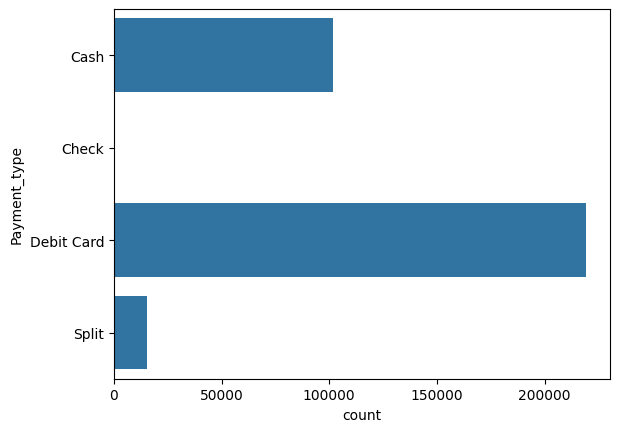

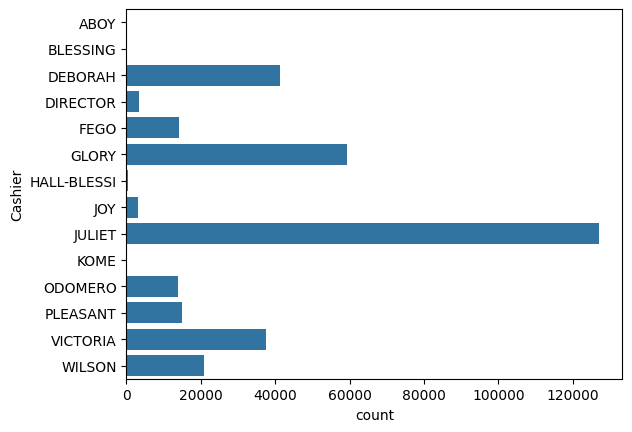

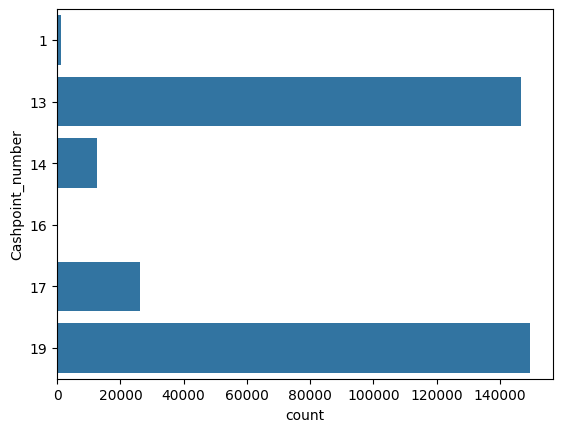

In [193]:
for field in categorical_columns:
    sns.countplot(import_df_clean[field])
    plt.show()

Plot of Time related distribution

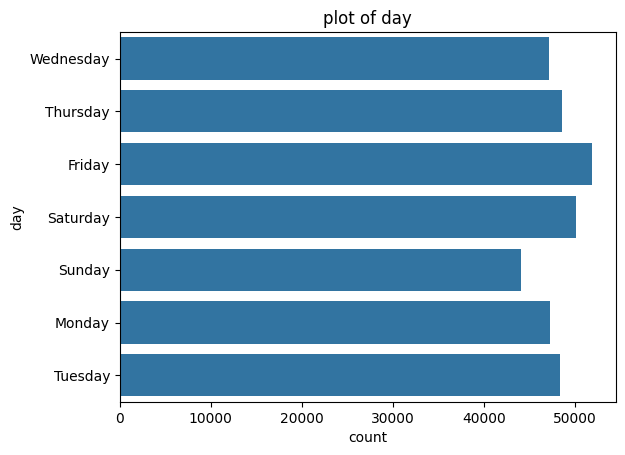

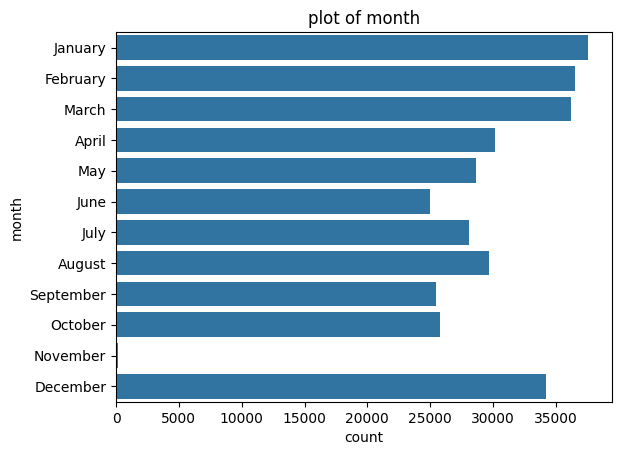

In [194]:
#plot the counts of the day, month.
date_parts = ['day','month']

for part in date_parts:
    sns.countplot(import_df[part])
    plt.title(f'plot of {part}')
    plt.show()

It can be observed that Friday and January has the highest frequency of all parts of the date field.

### BIVARATE ANALYSIS OF COLUMNS

Analysis of quantity and amount against time of day, day, month and year

In [202]:
time_of_day_group = import_df_clean[['Total_qnty','Total_amount', 'hour']].groupby('hour').mean()
time_of_day_group_df = pd.DataFrame(time_of_day_group)
time_of_day_group_df.head(30)
# print(time_of_day_group)

,Total_qnty,Total_amount
hour,,
7,7.740566,9071.958008
8,9.824126,11187.621094
9,11.815097,12191.205078
10,14.558850,16421.599609
11,14.740669,15027.539062
12,12.477306,12719.092773
13,11.945310,11495.767578
14,11.669715,11593.415039
15,11.886661,12644.566406


In [200]:
day_group = import_df_clean[['Total_qnty','Total_amount', 'day']].groupby('day').median()
day_group_df = pd.DataFrame(day_group)
day_group_df.head(12)

,Total_qnty,Total_amount
day,,
Friday,5.0,4920.0
Monday,5.0,4470.0
Saturday,5.0,4520.0
Sunday,6.0,5030.0
Thursday,5.0,4700.0
Tuesday,5.0,4760.0
Wednesday,5.0,4410.0


In [53]:
month_group = import_df[['quantity','amount', 'month']].groupby('month').sum()
month_group_df = pd.DataFrame(month_group)
month_group_df.head(12)

,quantity,amount
month,,
April,47899,36723116.0
August,50778,40690472.0
December,59169,46616068.0
February,61054,48121420.0
January,64095,51750676.0
July,48790,38786284.0
June,40346,32737294.0
March,60725,47818860.0
May,46151,35724304.0
